In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [3]:
library(MASS)
library(corrr)

In [8]:
set.seed(1)
# Simulate three columns correlating about .7 with each other
mu <- rep(0, 3)
Sigma <- matrix(.7, nrow = 3, ncol = 3) + diag(3)*.3
seven <- mvrnorm(n = 1000, mu = mu, Sigma = Sigma)

# Simulate three columns correlating about .4 with each other
mu <- rep(0, 3)
Sigma <- matrix(.4, nrow = 3, ncol = 3) + diag(3)*.6
four <- mvrnorm(n = 1000, mu = mu, Sigma = Sigma)

# Bind together
d <- cbind(seven, four)
colnames(d) <- paste0("v", 1:ncol(d))

# Insert some missing values
d[sample(1:nrow(d), 100, replace = TRUE), 1] <- NA
d[sample(1:nrow(d), 200, replace = TRUE), 5] <- NA

In [9]:
head(seven)

-0.6960673,-1.03759366,0.05270901
-0.3931088,-0.26890989,1.15478548
-0.2648917,-0.41192202,-1.56541315
1.6769523,1.31591358,1.28772173
0.2857491,0.26559287,0.33282018
-0.7772382,-0.01501928,-1.40929020


In [10]:
head(four)

-0.9933378,0.6090869,-1.333296972
-0.2250492,-0.8751502,0.201801924
-2.0926991,-0.2276214,-0.692234342
1.7117664,0.3529101,-0.197375609
2.5288824,1.2039795,-0.008696356
-1.5835327,-0.1994542,-0.385692320


In [11]:
head(d)

v1,v2,v3,v4,v5,v6
-0.6960673,-1.03759366,0.05270901,-0.9933378,NA,-1.333296972
-0.3931088,-0.26890989,1.15478548,-0.2250492,-0.8751502,0.201801924
-0.2648917,-0.41192202,-1.56541315,-2.0926991,NA,-0.692234342
1.6769523,1.31591358,1.28772173,1.7117664,NA,-0.197375609
0.2857491,0.26559287,0.33282018,2.5288824,1.2039795,-0.008696356
-0.7772382,-0.01501928,-1.40929020,-1.5835327,-0.1994542,-0.385692320


In [12]:
# Correlate
x <- correlate(d)
class(x)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


[1] "cor_df"     "tbl_df"     "tbl"        "data.frame"

In [13]:
x

term,v1,v2,v3,v4,v5,v6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
v1,NA,0.69570543,0.70537347,0.01372850,0.009060348,-0.04672651
v2,0.695705428,NA,0.69741127,-0.01325755,0.022058825,-0.03383145
v3,0.705373470,0.69741127,NA,-0.02527525,-0.016649926,-0.02005750
v4,0.013728503,-0.01325755,-0.02527525,NA,0.451639286,0.44246974
v5,0.009060348,0.02205882,-0.01664993,0.45163929,NA,0.42491124
v6,-0.046726506,-0.03383145,-0.02005750,0.44246974,0.424911236,NA


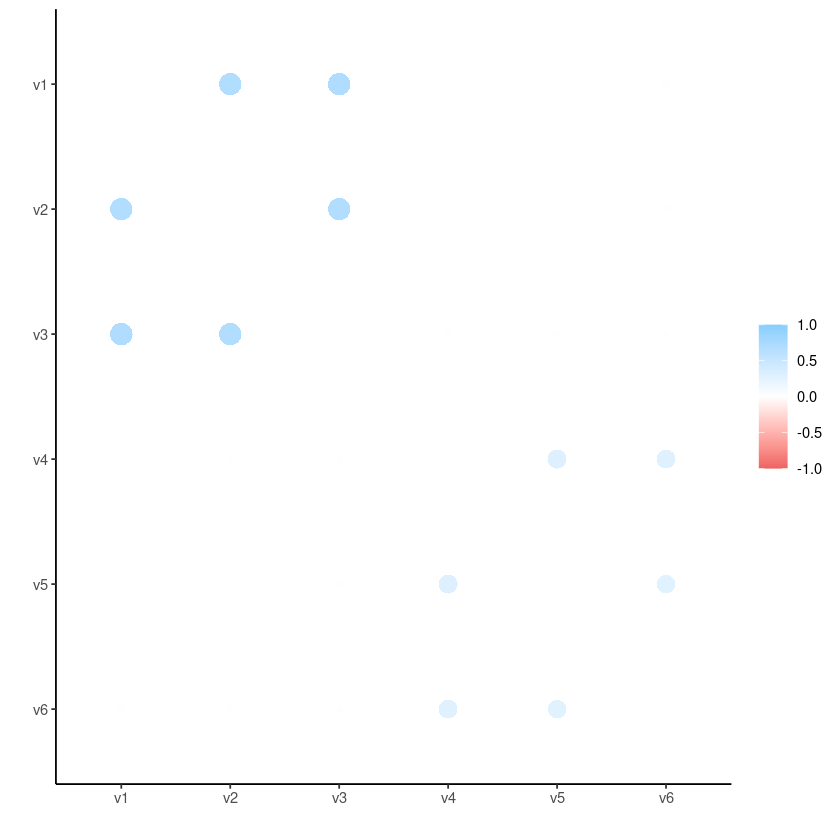

In [14]:
rplot(x)